In [615]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import requests
from bs4 import BeautifulSoup as bs
print("Libraries imported successfully")

Libraries imported successfully


In [618]:
#extract webpage source code
URL = 'https://www.worldometers.info/coronavirus/'
page = requests.get(URL)
soup = bs(page.content, 'html.parser')
##print(soup)

In [619]:
results = soup.find(id='main_table_countries_today')
##print(results.prettify())

In [620]:
#extract headings
headings = []
th_headings = results.find_all("th")
for th_heading in th_headings:
    th_heading = (th_heading.text).strip("\n")
    headings.append(th_heading)
print(headings)

['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/\n1M pop', 'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl', '1 Testevery X ppl']


In [557]:
covid_table = []

for row in results.find_all('tr'):
    rows = []
    
    for cell in row.find_all('td'):
        rows.append((cell.text).strip("\n"))
    
    if(len(rows)> 0):
        data = {
                headings[0]: rows[0],
                headings[1]: rows[1],
                headings[2]: rows[2],
                headings[3]: rows[3],
                headings[4]: rows[4],
                headings[5]: rows[5],
                headings[6]: rows[6],
                headings[7]: rows[7],
                headings[8]: rows[8],
                headings[9]: rows[9],
                headings[10]: rows[10],            
        }
        
        covid_table.append(data)
        


In [558]:
#create a dataframe 
df = pd.DataFrame(covid_table)
df.head(15)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,,North America,"26,174,374","+11,005","554,629",+511,"15,996,365","+7,168","9,623,380","34,825",
1,,Asia,"21,482,130","+1,312","348,481",+15,"19,956,683","+2,572","1,176,966","23,983",
2,,South America,"13,973,233","+1,098","376,776",+25,"12,444,497",+383,"1,151,960","18,668",
3,,Europe,"25,942,885",,"589,321",,"13,900,974",,"11,452,590","28,554",
4,,Africa,"3,067,399",,"72,810",,"2,478,497",,"516,092","2,482",
5,,Oceania,"49,006",+19,"1,067",,"33,658",+12,"14,281",21,
6,,,721,,15,,706,,0,0,
7,,World,"90,689,748","+13,434","1,943,099",+551,"64,811,380","+10,135","23,935,269","108,533","11,635"
8,1,USA,"22,917,334",,"383,275",,"13,483,490",,"9,050,569","28,931","69,022"
9,2,India,"10,467,431",,"151,198",,"10,092,130",,"224,103","8,944","7,546"


In [559]:
#clean the data
df.replace('',0, inplace=True)
df.replace('N/A',0, inplace=True)
df.replace(' ',0, inplace=True)
df.replace(',','', regex=True, inplace=True)
df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,0,North America,26174374,+11005,554629,+511,15996365,+7168,9623380,34825,0
1,0,Asia,21482130,+1312,348481,+15,19956683,+2572,1176966,23983,0
2,0,South America,13973233,+1098,376776,+25,12444497,+383,1151960,18668,0
3,0,Europe,25942885,0,589321,0,13900974,0,11452590,28554,0
4,0,Africa,3067399,0,72810,0,2478497,0,516092,2482,0


In [560]:
#check the missing data
missing_data = df.isnull()
missing_data.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [561]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

#
False    236
Name: #, dtype: int64

Country,Other
False    236
Name: Country,Other, dtype: int64

TotalCases
False    236
Name: TotalCases, dtype: int64

NewCases
False    236
Name: NewCases, dtype: int64

TotalDeaths
False    236
Name: TotalDeaths, dtype: int64

NewDeaths
False    236
Name: NewDeaths, dtype: int64

TotalRecovered
False    236
Name: TotalRecovered, dtype: int64

NewRecovered
False    236
Name: NewRecovered, dtype: int64

ActiveCases
False    236
Name: ActiveCases, dtype: int64

Serious,Critical
False    236
Name: Serious,Critical, dtype: int64

Tot Cases/1M pop
False    236
Name: Tot Cases/1M pop, dtype: int64



In [562]:
#rename the columns
df = df.rename(columns={"#": "Index", "Country,Other": "Countries", "Serious,Critical":"CriticalCases", "Tot\xa0Cases/1M pop":"TotalCasesPer1M"})
df.columns = list(map(str, df.columns))

In [563]:
df["Countries"].astype('str')
df["TotalCases"].astype('int32')
df["NewCases"].astype('int32')
df["TotalDeaths"].astype('int32')
df["NewDeaths"].astype('int32')
df["TotalRecovered"].astype('int32')
df["NewRecovered"].astype('int32')
df["ActiveCases"].astype('int32')
df["CriticalCases"].astype('int32')
df["TotalCasesPer1M"].astype('float')
print("valid datatypes changed")

valid datatypes changed


In [565]:
#drop unnecessary rows 
df=df.drop(df.index[[0,1,2,3,4,5,6,7]],axis=0)
df=df.drop(["NewCases","NewDeaths","NewRecovered","CriticalCases","TotalCasesPer1M"],axis=1)
df=df.reset_index().drop(columns=['index'])
df.head(15)



,Index,Countries,TotalCases,TotalDeaths,TotalRecovered,ActiveCases
0,1,USA,22917334,383275,13483490,9050569
1,2,India,10467431,151198,10092130,224103
2,3,Brazil,8105790,203140,7167651,734999
3,4,Russia,3401954,61837,2778889,561228
4,5,UK,3072349,81431,1406967,1583951
5,6,France,2783256,67750,202429,2513077
6,7,Turkey,2326256,22807,2198150,105299
7,8,Italy,2276491,78755,1617804,579932
8,9,Spain,2050360,51874,0,0
9,10,Germany,1929353,41434,1525300,362619


In [567]:
df_top10=df.head(9)
df_top10.TotalCases=pd.to_numeric(df_top10.TotalCases)
df_top10.TotalDeaths=pd.to_numeric(df_top10.TotalDeaths)
df_top10.TotalRecovered=pd.to_numeric(df_top10.TotalRecovered)
df_top10.AcriveCases=pd.to_numeric(df_top10.ActiveCases)

<ipython-input-567-6c3e2916c0fb>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_top10.AcriveCases=pd.to_numeric(df_top10.ActiveCases)


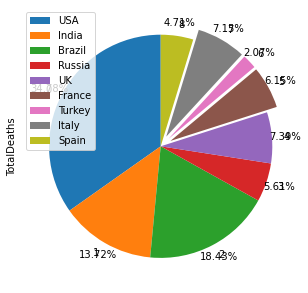

In [576]:
explode_list = [0, 0, 0, 0,0, 0.1, 0.1,0.1,0]
df_top10["TotalDeaths"].plot(kind='pie' ,figsize=(5, 6),
                           autopct='%1.2f%%',
                             pctdistance=1.12,  
                           explode=explode_list,
                            startangle=90,
                           # shadow=True,)
                            )
plt.legend(labels=df_top10.Countries) 
plt.show()


df_top10.plot(kind='bar', x="Countries", y="TotalDeaths",  figsize=(10, 6))
plt.xlabel("Countries")
plt.ylabel("Number of Deaths")
plt.show()

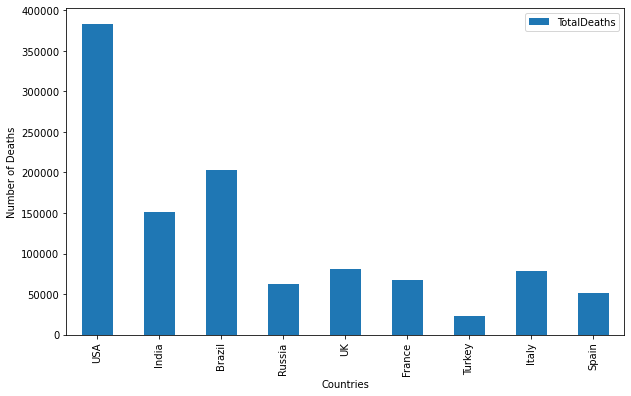

In [604]:
df_top10.plot(kind='bar', x="Countries", y="TotalDeaths", figsize=(10, 6))
plt.xlabel("Countries")
plt.ylabel("Number of Deaths")
plt.show()

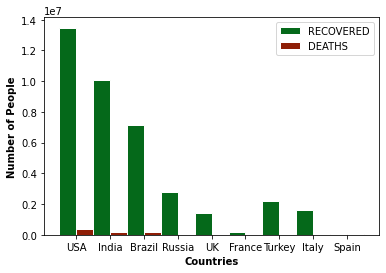

In [614]:
r1 = np.arange(len(df_top10.TotalRecovered))
r2 = [x + 0.5 for x in r1]
plt.bar(r1,df_top10.TotalRecovered, color='#05691A', width=0.5, edgecolor='white', label='RECOVERED')
plt.bar(r2 ,df_top10.TotalDeaths, color='#8E1E06',  width=0.5, edgecolor='white', label='DEATHS')
plt.xlabel('Countries', fontweight='bold')
plt.ylabel('Number of People', fontweight='bold')
plt.xticks([r + 0.25 for r in range(len(df_top10.TotalDeaths))], df_top10.Countries)

plt.legend()
plt.show()